In [56]:
import pandas as pd
import numpy as np


In [57]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
imports = pd.read_csv('imports-85.data', names=cols)

imports.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [58]:
# clean data
imports = imports.replace('?', np.nan)
imports.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [59]:
#choose only continuous columns
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
imports = imports[continuous_cols]

In [60]:
imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [61]:
#change type
imports = imports.astype(float)
#remove rows with missing price value
imports = imports.dropna(subset=['price'])
imports.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [63]:
#change null value to mode
imports = imports.fillna(imports.mean())
imports.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [64]:
imports.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,161.000000,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.236364,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0


# Univariate function##

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,targ_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #shuffle the dataset
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #divide the dataset in half to use one as training set switch to test set
    half = int(len(random_df) / 2)
    
    training_set = random_df.iloc[0:half]
    test_set = random_df.iloc[half:]
    
    k_values = [1,3,5,7]
    k_rmses = {}
    
    #k-nearest-neighbour with each k
    for k in k_values:
        #fit model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(training_set[[train_col]], training_set[targ_col])

        #predict
        predict_label = knn.predict(test_set[[train_col]])

        #RMSE.
        mse = mean_squared_error(test_set[targ_col], predict_label)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    
    return k_rmses

k_rmse_results = {}

#use every column to predict
train_cols = imports.columns.drop('price')
for col in train_cols:
    rmse = knn_train_test(col, 'price', imports)
    k_rmse_results[col] = rmse

print(k_rmse_results)

{'stroke': {1: 9043.351317377035, 3: 7247.307977352132, 5: 7954.3010342434445, 7: 7777.566954222874}, 'wheel-base': {1: 4493.734068810494, 3: 5208.39331165465, 5: 5460.851458362242, 7: 5448.1070513823315}, 'height': {1: 8751.160007407449, 3: 8121.165102604576, 5: 8073.1197593196175, 7: 7693.302663098179}, 'curb-weight': {1: 5264.290230758878, 3: 5022.318011757233, 5: 4445.141920375235, 7: 4330.608104418053}, 'compression-rate': {1: 8087.205346523092, 3: 7375.063685578359, 5: 6610.812153159129, 7: 6732.801282941515}, 'bore': {1: 8602.58848450066, 3: 6984.239489480916, 5: 6795.388311535586, 7: 6896.559499627726}, 'highway-mpg': {1: 6025.594966720739, 3: 4671.390389789466, 5: 4643.046277675214, 7: 4792.485755925797}, 'width': {1: 4559.257297950061, 3: 4595.4858709976525, 5: 4772.459149439554, 7: 4715.918441236321}, 'normalized-losses': {1: 8006.716513448735, 3: 6696.878526843706, 5: 7000.9262234463395, 7: 7454.862187959139}, 'engine-size': {1: 3258.4861059962027, 3: 2951.5259704863593, 5:

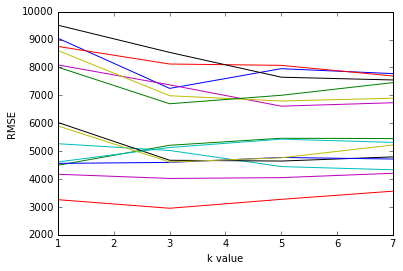

In [66]:
#visualize rmse
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

it seems k = 3 has lowest rmse

# Using multivariate function

choose 2,3,4, or 5 best features from univariate function here

In [71]:
feature_avg_rmse = {}

for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values(ascending = False)
print(sorted_series_avg_rmse)

peak-rpm             8311.985870
height               8159.686883
stroke               8005.631821
bore                 7319.693946
normalized-losses    7289.845863
compression-rate     7201.470617
wheel-base           5152.771473
city-mpg             5122.155422
length               5120.595682
highway-mpg          5033.129348
curb-weight          4765.589567
width                4660.780190
horsepower           4110.997886
engine-size          3261.137197
dtype: float64


In [80]:
#best features
sorted_features = list(sorted_series_avg_rmse.index)
print(sorted_features)

['peak-rpm', 'height', 'stroke', 'bore', 'normalized-losses', 'compression-rate', 'wheel-base', 'city-mpg', 'length', 'highway-mpg', 'curb-weight', 'width', 'horsepower', 'engine-size']
['peak-rpm', 'height']


In [82]:
def knn_train_test2(training_cols, targ_col, df):
    np.random.seed(1)
    
    #shuffle the dataset
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #divide the dataset in half to use one as training set switch to test set
    half = int(len(random_df) / 2)
    training_set = random_df.iloc[0:half]
    test_set = random_df.iloc[half:]
    
    k_values = [1,3,5,7]
    k_rmses = {}
    

    #k-nearest-neighbour with each k
    for k in k_values:
        #fit model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(training_set[train_cols], training_set[targ_col])

        #predict
        predict_label = knn.predict(test_set[train_col])
        
        #RMSE.
        mse = mean_squared_error(test_set[targ_col], predict_label)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse

    return k_rmses

k_rmse_results = {}

for features in range(2,6):
    k_rmse_results['{} best features'.format(features)] = knn_train_test(
        sorted_features[features], 'price', imports)

k_rmse_results

{'2 best features': {1: 8426.530091688905,
  2: 8070.684573666832,
  3: 8171.948043397144,
  4: 7882.768805609994,
  5: 7311.267262747733,
  6: 7035.505406572267,
  7: 6987.428120498931,
  8: 6957.864257858577,
  9: 6964.615341357639,
  10: 7007.987863223588,
  11: 7019.8312530145795,
  12: 7045.744194036551,
  13: 7136.274853590373,
  14: 7267.052963474549,
  15: 7303.12608199728,
  16: 7348.174812308584,
  17: 7333.238883594461,
  18: 7403.538648429787,
  19: 7579.919670737432,
  20: 7767.1052698317735,
  21: 7814.233756319392,
  22: 7819.795313363487,
  23: 7913.9158490014925,
  24: 7893.190020770085},
 '3 best features': {1: 8265.174183713778,
  2: 8061.70699960776,
  3: 8122.028828398046,
  4: 7804.746144015496,
  5: 7296.117592335537,
  6: 7001.2261861573925,
  7: 6980.515011271763,
  8: 6948.644483914143,
  9: 6963.325527076816,
  10: 6989.989629519637,
  11: 7016.8651285356445,
  12: 7048.176057619812,
  13: 7165.5430066271365,
  14: 7269.719992711464,
  15: 7298.114624693114,


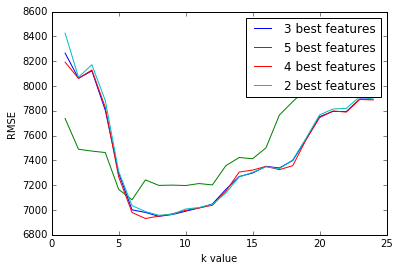

In [83]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()